In [3]:
df = pd.read_csv('./alltrip.csv',index_col=0)

In [5]:
### rule out irrational data
df = df.fillna(0)
df = df[(df['Distance']<=200) & (df['Distance']>=0)]
df = df[(df['fare']<=500) & (df['fare']>=0)]

In [7]:
df.head()

,Avg_speed,Distance,EndJD,EndTime,EndWD,End_idx,Faraway,FromAirport,InNearby,StartJD,StartTime,StartWD,Start_idx,fare
4,76.531250,0.359723,114.164536,2011/04/18 01:36:05,22.561951,171.0,0.0,1.0,0.0,113.815483,2011/04/18 01:02:34,22.648916,106.0,137.141949
70,75.125000,0.225440,114.028130,2011/04/19 13:46:39,22.540083,2545.0,1.0,1.0,0.0,113.831200,2011/04/19 13:28:07,22.649817,2528.0,66.195578
100,74.000000,0.277574,114.064201,2011/04/20 01:27:42,22.521566,3704.0,0.0,1.0,0.0,113.816467,2011/04/20 01:05:11,22.646767,3694.0,100.903754
145,59.500000,0.056493,113.869102,2011/04/20 22:33:54,22.620951,4911.0,0.0,1.0,1.0,113.818649,2011/04/20 22:28:50,22.646366,4906.0,20.137486
146,69.869565,0.137607,113.925652,2011/04/21 00:02:57,22.566683,5016.0,1.0,1.0,0.0,113.815269,2011/04/20 23:51:27,22.648849,4992.0,42.644351


In [15]:
nearby_group = df.groupby(['InNearby']).size()
nearby_group

InNearby
0.0    21028
1.0    11841
dtype: int64

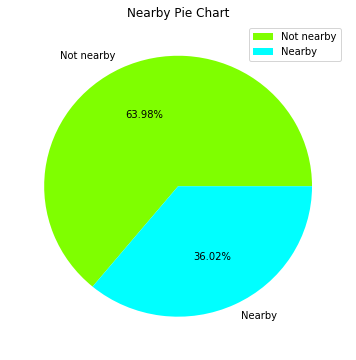

In [20]:
### whether final destination is nearby
plt.figure(figsize=(6,6))

plt.pie([nearby_group[0],nearby_group[1]],colors=('chartreuse','cyan'),labels=("Not nearby","Nearby"),  autopct='%1.2f%%')
plt.title("Nearby Pie Chart")
plt.legend(loc=0)

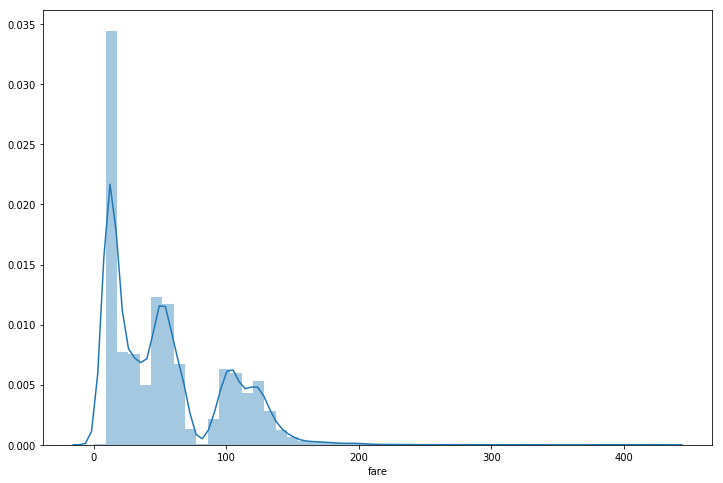

In [40]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df['fare'])

In [46]:
short_df = df[df['InNearby']==1]
long_df = df[df['InNearby']==0]

In [27]:
def norm_pdf(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
    return pdf

### fit short trip fare

In [80]:
short_df = short_df[short_df['fare']!=0]
short_mean = np.mean(short_df['fare'])
short_std = np.std(short_df['fare'])
short_size = short_df.shape[0]

In [97]:
short_std

8.155739808047647

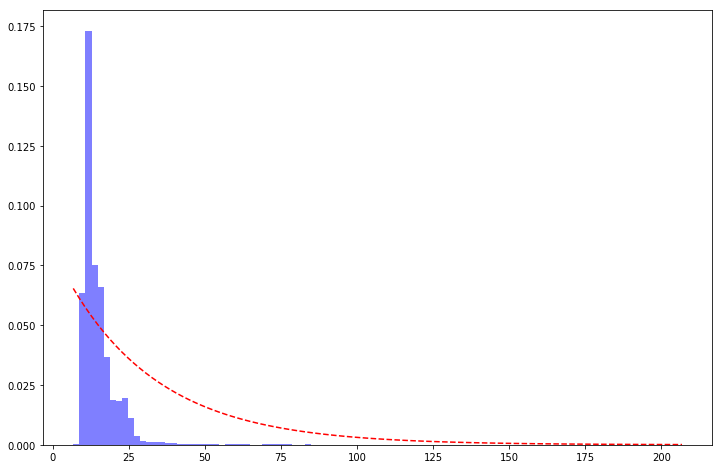

In [96]:
fig = plt.figure(figsize=(12,8))

num_bins = 100
n, bins, patches = plt.hist(short_df['fare'], num_bins,normed=1, facecolor='blue', alpha=0.5) 
lam = 1/short_mean
x = np.arange(0,100+1,1)
y = lam * np.exp(- lam * x)
plt.plot(bins, y, 'r--')

### fit long trip fare

In [47]:
long_mean = np.mean(long_df['fare'])
long_std = np.std(long_df['fare'])
long_size = long_df.shape[0]

In [84]:
long_mean

75.89804072021579

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


Text(0,0.5,'Probability')

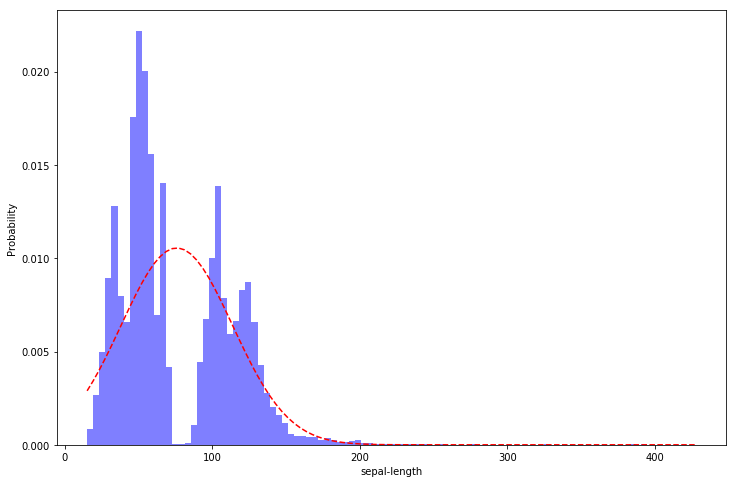

In [58]:
fig = plt.figure(figsize=(12,8))

num_bins = 100
n, bins, patches = plt.hist(long_df['fare'], num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins, long_mean, long_std)
plt.plot(bins, y, 'r--')  
plt.xlabel('sepal-length')
plt.ylabel('Probability') 

In [59]:
print(short_mean, short_std, long_mean, long_std)

14.711914992669351 8.399341514874573 75.89804072021579 37.81963940113318


### fit all trip fare

In [60]:
all_mean = np.mean(df['fare'])
all_std = np.std(df['fare'])
all_size = df.shape[0]

In [99]:
all_mean

53.855845498582106

In [100]:
all_std

42.465118386608154

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


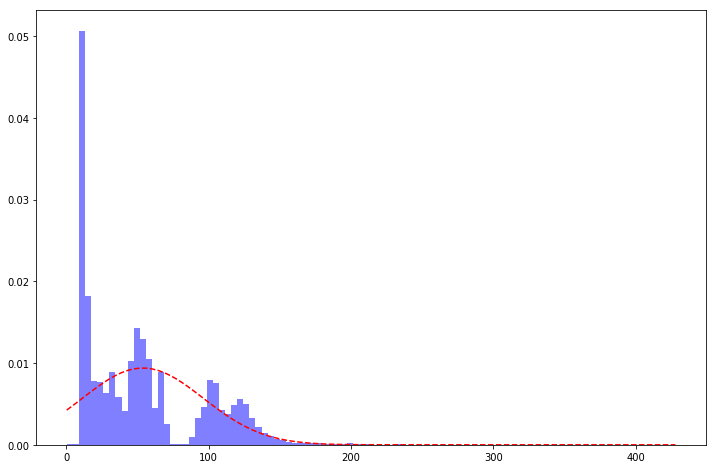

In [115]:
fig = plt.figure(figsize=(12,8))

num_bins = 100
n, bins, patches = plt.hist(df['fare'], num_bins,normed=1, facecolor='blue', alpha=0.5) 
y = mlab.normpdf(bins, all_mean, all_std)
plt.plot(bins, y, 'r--')  

In [69]:
temp = df['fare']